# Machine Learning Project Code

In [36]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.tree import export_text
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [2]:
# Read the csv file
students = pd.read_csv("data.csv", delimiter=";")

**Explore Data**

In [3]:
# Display the head
students.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


All columns are numerical so there is no need for dummies here

In [4]:
# Display the shape
students.shape

(4424, 37)

In [5]:
# Brief information about the data
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
# Properly formating the column names
students.columns = students.columns.str.lower().str.strip().str.replace(' ', '_')

In [7]:
# Counting the values of each unique target 
students['target'].value_counts()

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [8]:
# Define a mapping dictionary
target_mapping = {
    'Graduate': 0,
    'Dropout': 1,
    'Enrolled': 2
}

# Apply the mapping to the target column
students['target'] = students['target'].map(target_mapping)

In [9]:
# Defining the features and target
features = students.drop(columns = ["target"])
target = students["target"]

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

# KNN
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

# Evaluating KNN model
knn.score(X_test, y_test)

0.5977401129943503

In [11]:
# Decision Tree
tree = DecisionTreeClassifier(max_depth=10)

tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree, average='macro'))
print("Precision:", precision_score(y_test, y_pred_tree, average='macro'))

Accuracy: 0.7220338983050848
Recall: 0.6311976149267448
Precision: 0.635204160128004


In [12]:
# Bagging and Pasting
bagging_class = BaggingClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=100, max_samples = 1000)
bagging_class.fit(X_train, y_train)
y_pred_bagging = bagging_class.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Recall:", recall_score(y_test, y_pred_bagging, average='macro'))
print("Precision:", precision_score(y_test, y_pred_bagging, average='macro'))

Accuracy: 0.7864406779661017
Recall: 0.693450963322244
Precision: 0.7338110777758722


In [13]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, max_samples=1000)

random_forest.fit(X_train, y_train)

y_pred_forest = random_forest.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Recall:", recall_score(y_test, y_pred_forest, average='macro'))
print("Precision:", precision_score(y_test, y_pred_forest, average='macro'))

Accuracy: 0.7898305084745763
Recall: 0.6790351922671669
Precision: 0.7482914289107097


In [14]:
# Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100, max_depth=10, subsample=0.8)

gradient_boosting.fit(X_train, y_train)

y_pred_boosting = gradient_boosting.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("Recall:", recall_score(y_test, y_pred_boosting, average='macro'))
print("Precision:", precision_score(y_test, y_pred_boosting, average='macro'))

Accuracy: 0.7988700564971751
Recall: 0.7117958523769549
Precision: 0.7517525530855366


In [15]:
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)

# Train the classifier
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = adaboost.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada, average='macro'))
print("Precision:", precision_score(y_test, y_pred_ada, average='macro'))

Accuracy: 0.7796610169491526
Recall: 0.6950680733900584
Precision: 0.7154121919012201


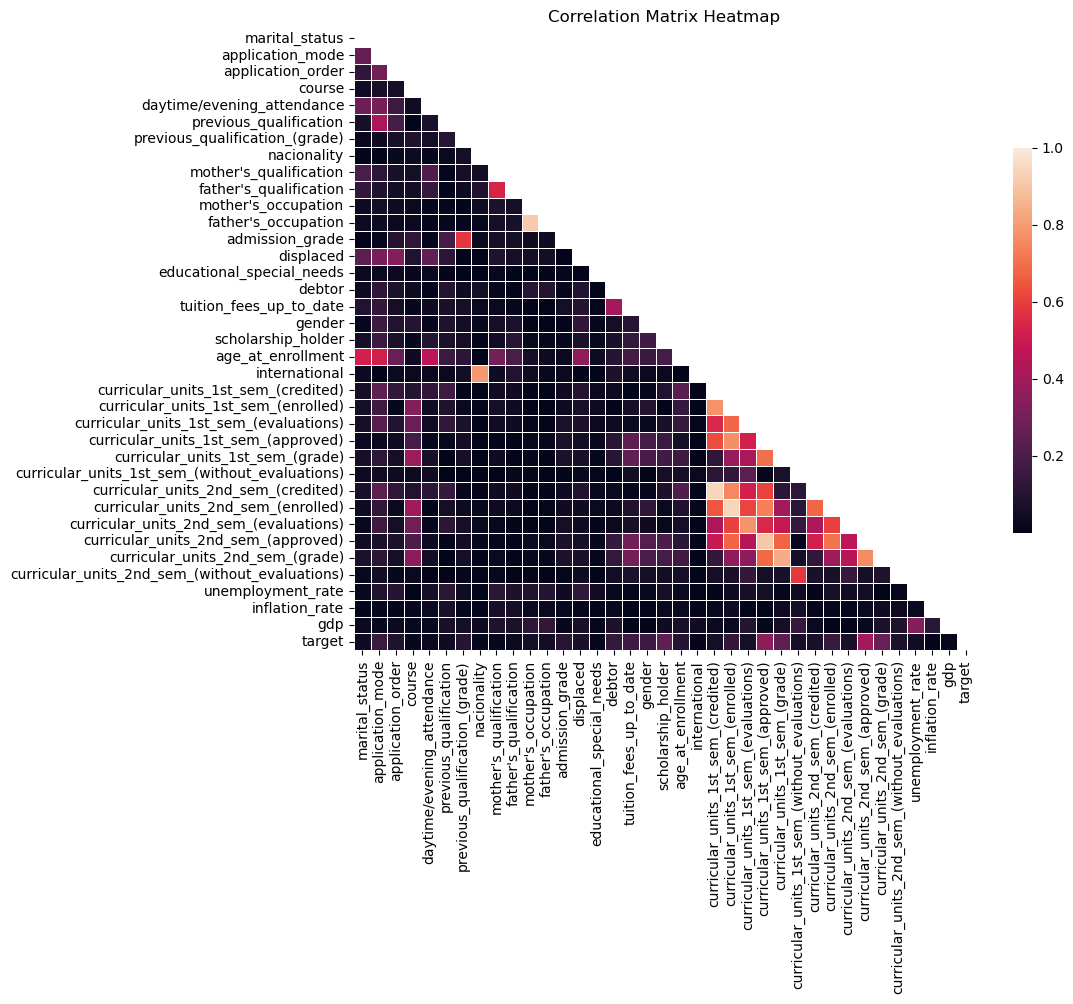

In [16]:
corr = np.abs(students.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.title('Correlation Matrix Heatmap')
plt.show()

# From this point forward the data is modified and tested for improvement.

In [17]:
# Columns droped because of high corralation with other variables, not the target
drop_col = ['curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)', 
            "father's_occupation"]

students_2 = students.drop(columns=drop_col)

# Select numerical columns for scaling
numerical_columns = students_2.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = MinMaxScaler()

# Exclude the target column from numerical columns
numerical_columns = numerical_columns.drop('target')

# Scale the numerical columns
students_2[numerical_columns] = scaler.fit_transform(students_2[numerical_columns])

# Defining the features and target
features_2 = students_2.drop(columns = ["target"])
target_2 = students_2["target"]

students_2.head()

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.0,0.418605,0.255814,...,0.0,0.00000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.0,0.000000,0.046512,...,0.0,0.26087,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687,0
2,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.0,0.837209,0.837209,...,0.0,0.26087,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182,1
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.0,0.860465,0.837209,...,0.0,0.26087,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174,0
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.0,0.837209,0.860465,...,0.0,0.26087,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687,0


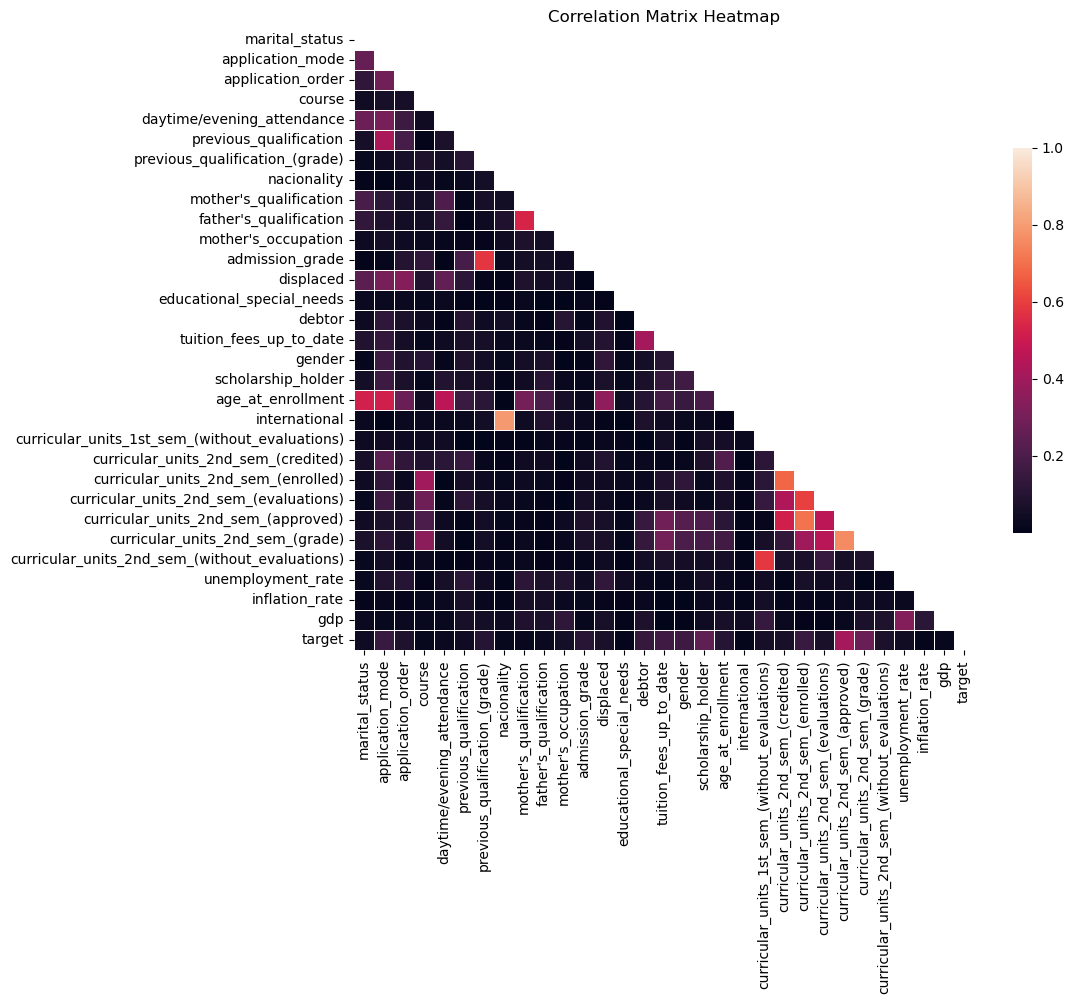

In [18]:
corr = np.abs(students_2.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [35]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features_2, target_2, test_size=0.20, random_state=0)

# KNN
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, y_train)

# Evaluating KNN model
knn.score(X_test, y_test)

0.6892655367231638

In [56]:
# Decision Tree
tree = DecisionTreeClassifier(max_depth=5)

tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree, average='macro'))
print("Precision:", precision_score(y_test, y_pred_tree, average='macro'))

Accuracy: 0.7435028248587571
Recall: 0.6445469777211219
Precision: 0.6928181469746875


In [55]:
# Bagging and Pasting
bagging_class = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100, max_samples = 1000)
bagging_class.fit(X_train, y_train)
y_pred_bagging = bagging_class.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Recall:", recall_score(y_test, y_pred_bagging, average='macro'))
print("Precision:", precision_score(y_test, y_pred_bagging, average='macro'))

Accuracy: 0.768361581920904
Recall: 0.652263815909931
Precision: 0.7038904591420136


In [52]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, max_samples=1000)

random_forest.fit(X_train, y_train)

y_pred_forest = random_forest.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Recall:", recall_score(y_test, y_pred_forest, average='macro'))
print("Precision:", precision_score(y_test, y_pred_forest, average='macro'))

Accuracy: 0.7751412429378531
Recall: 0.6545700546176249
Precision: 0.7209319011508587


In [54]:
# Gradient Boosting
gradient_boosting = GradientBoostingClassifier(n_estimators=100, max_depth=5, subsample=0.8)

gradient_boosting.fit(X_train, y_train)

y_pred_boosting = gradient_boosting.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("Recall:", recall_score(y_test, y_pred_boosting, average='macro'))
print("Precision:", precision_score(y_test, y_pred_boosting, average='macro'))

Accuracy: 0.7875706214689265
Recall: 0.7140549699965799
Precision: 0.7317361499519142


In [48]:
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)

# Train the classifier
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ada = adaboost.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada, average='macro'))
print("Precision:", precision_score(y_test, y_pred_ada, average='macro'))

Accuracy: 0.7604519774011299
Recall: 0.633904382883023
Precision: 0.7001015744032504


In [47]:
# Define the model
gbc = GradientBoostingClassifier() 

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.1, 0.5, 1.0],
    'subsample': [0.8, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print("Best parameters from Grid Search:", best_params)

# Train the model with the best parameters
best_gbc = grid_search.best_estimator_
best_gbc.fit(X_train, y_train)

# Evaluate the model
y_pred = best_gbc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("Precision:", precision_score(y_test, y_pred, average='macro'))

Best parameters from Grid Search: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.7966101694915254
Recall: 0.719813035682824
Precision: 0.743014887114266


# Additional Models

In [41]:
!pip install xgboost
!pip install lightgbm
!pip install catboost
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# LightGBM
lgbm_model = LGBMClassifier(random_state=0)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))

# CatBoost
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost))


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:35
   ---------------------------------------- 0.1/99.8 MB 901.1 kB/s eta 0:01:51
   ---------------------------------------- 0.2/99.8 MB 958.1 kB/s eta 0:01:44
   ---------------------------------------- 0.3/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.3/99.8 MB 1.4 MB/s eta 0:01:09
   ---------------------------------------- 0.6/99.8 MB 2.2 MB/s eta 0:00:47
   ---------------------------------------- 0.8/99.8 MB 2.4 MB/s eta 0:00:41
   ---------------------------------------- 1.1/99.8 MB 3.0 MB/s eta 0:00:33
    --------------------------------------- 1.4/99.8 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.7/99.8 MB 3.7 MB/s eta 0:00:27
    --------------------------------------- 2.0/99.8 MB 4.1 MB/s eta 0:00:24
  

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 2.0 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.3 MB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.1/1.3 MB 1.2 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.3 MB 1.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.3 MB 1.7 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.3 MB 2.2 MB/s eta 0:00:01
   ------------------------ --------------- 0.8/1.3 MB 2.7 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.3 MB 2.8 MB/s eta 0:00:01
   ------------------------------------- -- 1.2/1.3 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   --------------------------

XGBoost Accuracy: 0.7864406779661017
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 3539, number of used features: 30
[LightGBM] [Info] Start training from score -0.699099
[LightGBM] [Info] Start training from score -1.135451
[LightGBM] [Info] Start training from score -1.705455
LightGBM Accuracy: 0.792090395480226
CatBoost Accuracy: 0.7966101694915254
